In [37]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. データの読み込みと前処理
# CSVファイルから株価データを読み込みます
df = pd.read_csv('japan_2022.csv')

# 'Close' 列（終値）を抽出
prices = df['Close'].values

In [38]:
# データのスケーリング（0から1の範囲に正規化）
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# シーケンスデータの作成関数
# 過去のn日間のデータを使って、次の日の価格を予測するためのデータを準備します
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# シーケンスの長さを設定（例: 過去60日間）
sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

# トレーニングデータとテストデータに分割します
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# RNNモデルの入力に合わせてデータの形を調整します
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Epoch 1/50
4/4 [==============================] - 1s 235ms/step - loss: 0.1219 - val_loss: 0.0445
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0880 - val_loss: 0.0206
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0661 - val_loss: 0.0320
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0567 - val_loss: 0.0245
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0451 - val_loss: 0.0184
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0338 - val_loss: 0.0188
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0351 - val_loss: 0.0187
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0333 - val_loss: 0.0192
Epoch 9/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0254 - val_loss: 0.0190
Epoch 10/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0277 - val_loss: 0.0182
Epoch 11/50
4/4 [===========

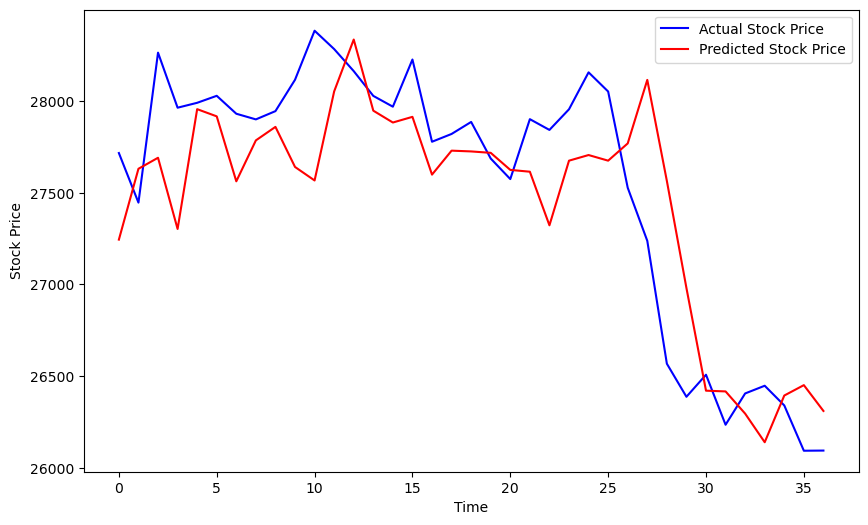

Epoch 1/50
4/4 [==============================] - 2s 123ms/step - loss: 0.2243 - val_loss: 0.0868
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0943 - val_loss: 0.0200
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0264 - val_loss: 0.0640
Epoch 4/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0447 - val_loss: 0.0343
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0228 - val_loss: 0.0173
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0252 - val_loss: 0.0170
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0244 - val_loss: 0.0163
Epoch 8/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0236 - val_loss: 0.0164
Epoch 9/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0187 - val_loss: 0.0181
Epoch 10/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0207 - val_loss: 0.0189
Epoch 11/50
4/4 [===========

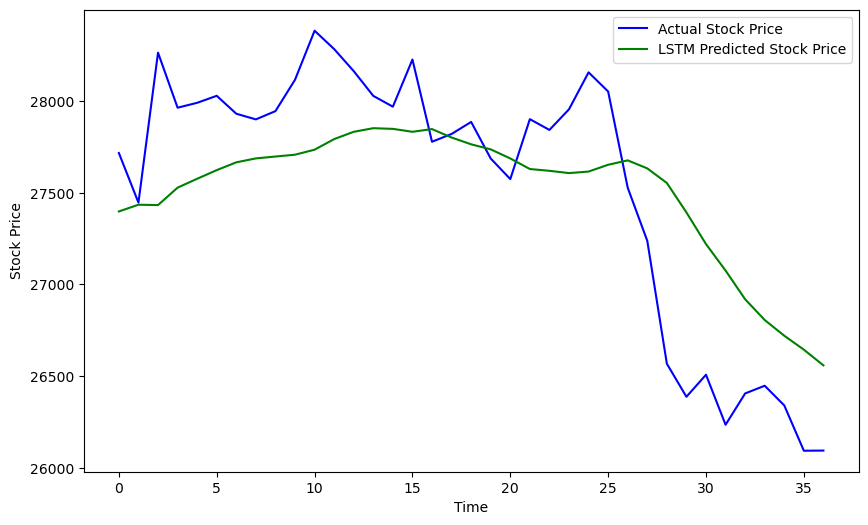

2/2 [==============================] - 0s 5ms/step


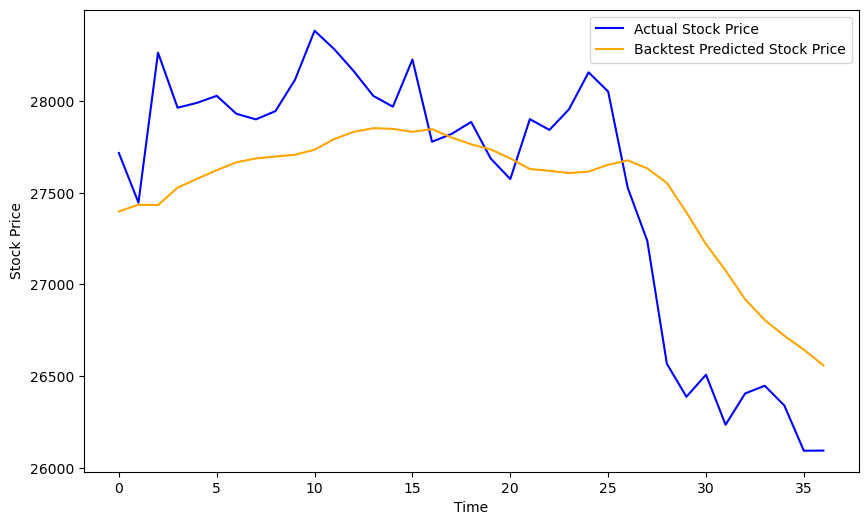

1/1 [==============================] - 0s 18ms/step
Real-Time Predicted Stock Price: 26488.09375


In [39]:
# 2. 基本的なRNNモデルの構築とトレーニング
# SimpleRNNレイヤーを使用したシンプルなRNNモデルを構築します
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))  # 過学習を防ぐためにドロップアウトを追加
model.add(Dense(1))  # 出力層

# オプティマイザーと損失関数の設定
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# モデルのトレーニング（訓練）
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 3. モデルの予測性能の評価
# テストデータでのモデルのパフォーマンスを評価します
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# テストデータを使用して予測を実行します
predictions = model.predict(X_test)

# スケーリングを戻して、元の価格に変換します
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 予測結果と実際の株価をプロットして可視化します
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 4. ハイパーパラメータの最適化
# ここでは、ハイパーパラメータ（エポック数、バッチサイズ、学習率など）のチューニングを行います
# グリッドサーチやランダムサーチを用いて最適なパラメータを探すことが考えられます
# 今回は、手動でいくつかのパラメータを変更して再トレーニングします

# 例: LSTMレイヤーを使用して、より高度なモデルを試してみます
# 5. LSTM/GRUの導入
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(sequence_length, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

# オプティマイザーと損失関数の設定
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# モデルのトレーニング（LSTM版）
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# テストデータでのLSTMモデルの評価
test_loss_lstm = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {test_loss_lstm}")

# LSTMモデルを使用して予測を実行
predictions_lstm = model_lstm.predict(X_test)

# スケーリングを戻す
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# LSTMモデルの予測結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions_lstm, color='green', label='LSTM Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. バックテストの実施
# 過去のデータを使って、モデルの予測がどれだけ正確かを評価します
# 既に構築したLSTMモデルを使ってバックテストを行います

# バックテストのために、テストデータを再利用
backtest_predictions = model_lstm.predict(X_test)
backtest_predictions = scaler.inverse_transform(backtest_predictions)

# バックテストの結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(backtest_predictions, color='orange', label='Backtest Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 7. リアルタイム予測のシミュレーション
# 最新のシーケンスデータを使用して、次の日の株価を予測します
new_data_sequence = scaled_prices[-sequence_length:]  # 最新の60日間のデータを使用
new_data_sequence = new_data_sequence.reshape((1, sequence_length, 1))

# リアルタイム予測
real_time_prediction = model_lstm.predict(new_data_sequence)

# スケーリングを戻して、予測結果を元の価格に変換
real_time_prediction = scaler.inverse_transform(real_time_prediction)

print(f"Real-Time Predicted Stock Price: {real_time_prediction[0][0]}")
